In [1]:
pip install pyts

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [2]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import scipy
import re
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.preprocessing as preprocessing
from collections import Counter

from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
import kerastuner as kt

os.chdir(os.getcwd())

#ZeroPadding3D
import tensorflow as tf
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField
from pyts.image import RecurrencePlot
import shutil
shutil.rmtree('C:\\Users\\jagat\\Downloads\\weights', ignore_errors=True)
shutil.rmtree('C:\\Users\\jagat\\Downloads\\logs', ignore_errors=True)
%matplotlib inline

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
#shutil.rmtree('/content/logs', ignore_errors=True)
#shutil.rmtree('/content/weights', ignore_errors=True)

In [ ]:
y_train_label = pd.read_csv('C:\\Users\\jagat\\Desktop\\Masters\\Team Project\\UCI\\UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',names = ['labels'])
body_acc_x_train = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',names = ['t'])
body_acc_y_train = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt',names = ['t'])
body_acc_z_train = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt',names = ['t'])
body_gyro_x_train = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt',names = ['t'])
body_gyro_y_train = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt',names = ['t'])
body_gyro_z_train = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt',names = ['t'])
total_acc_x_train = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt',names = ['t'])
total_acc_y_train = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt',names = ['t'])
total_acc_z_train = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt',names = ['t'])
y_train_label

In [ ]:
C:\\Users\\jagat\\Desktop\\Masters\\Team Project\\UCI\\UCI HAR Dataset\\train\\y_train.txt

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("============GPU================")
# 查看GPU信息
!/opt/bin/nvidia-smi
print("============CPU================")
# 查看cpu配置
!cat /proc/cpuinfo | grep model\ name
print("=============MEMORY===============")
# 查看内存容量
!cat /proc/meminfo | grep MemTotal

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17102948722010931612
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4162256896
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9729967379166032831
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]
============GPU================
============CPU================


The system cannot find the path specified.


=============MEMORY===============


'cat' is not recognized as an internal or external command,
operable program or batch file.
'cat' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
DATADIR = 'C:\\Users\\jagat\\Desktop\\Masters\\Team Project\\UCI\\UCI HAR Dataset'
#DATADIR = '/content/drive/MyDrive/TeamIndia/Dataset/UCI-HAD/UCI HAR Dataset/UCI HAR Dataset'

In [6]:
SIGNALS = [
    "body_acc_x","body_acc_y","body_acc_z",
    "body_gyro_x","body_gyro_y","body_gyro_z",
    "total_acc_x","total_acc_y","total_acc_z"]

def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'{DATADIR}/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 
    return np.transpose(signals_data, (1, 2, 0))

In [7]:
class_labels=['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

In [8]:
def load_y(subset):
    filename = f'{DATADIR}/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

def load_data():
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [9]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))
X_train, X_test, Y_train, Y_test = load_data()

In [10]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((7352, 128, 9), (7352, 6), (2947, 128, 9), (2947, 6))

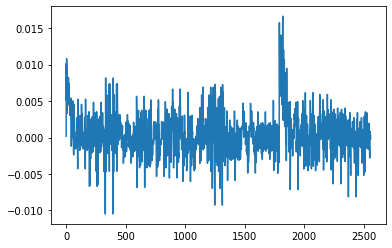

In [11]:
plt.plot(X_train[:20,:,0].reshape(-1,1));

In [12]:
def plot_graphs(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.plot(train_acc, 'C0', label='train')
    plt.plot(val_acc, 'C1', label='test')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy") 
    plt.title("Epoch vs Accuracy")
    plt.legend()
    plt.show()

    train_acc = history.history['loss']
    val_acc = history.history['val_loss']
    plt.plot(train_acc, 'C0', label='train')
    plt.plot(val_acc, 'C1', label='test')
    plt.xlabel("Epochs")
    plt.ylabel("Loss") 
    plt.title("Epoch vs Loss")
    plt.legend()
    plt.show()
    
    shutil.rmtree('C:\\Users\\jagat\\Downloads\\weights', ignore_errors=True)
    shutil.rmtree('C:\\Users\\jagat\\Downloads\\logs', ignore_errors=True)
    shutil.rmtree('/content/logs', ignore_errors=True)
    shutil.rmtree('/content/weights', ignore_errors=True)
def calc_scores(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    return len(train_acc),train_acc[-1]*100,val_acc[-1]*100

scores=np.zeros(shape=(8,3))

In [13]:
X_train_base= X_train.reshape(-1,32,X_train.shape[2]*4,1) #(-1,X_train.shape[1]*X_train.shape[2])
X_test_base= X_test.reshape(-1,32,X_train.shape[2]*4,1) #reshape(-1,X_test.shape[1]*X_test.shape[2])
x1,x2,x3, x4= X_train_base.shape
#X_train_base=X_train_base.reshape(x1,x2,x3,1)
#X_test_base=X_test_base.reshape(x1,x2,x3,1)
x1,x2,x3

(7352, 32, 36)

Model: "CNN_simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 32, 32)        832       
                                                                 
 dropout (Dropout)           (None, 28, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 16, 32)       0         
 )                                                               
                                                                 
 zero_padding2d (ZeroPadding  (None, 16, 18, 32)       0         
 2D)                                                             
                                                        

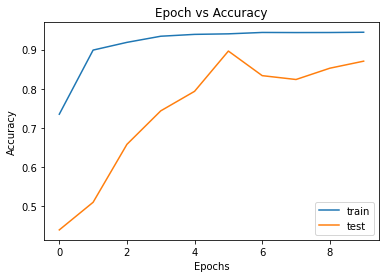

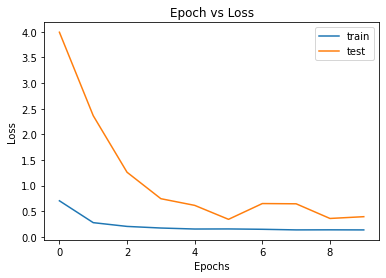

In [14]:

np.random.seed(0) 
model_simple_CNN = models.Sequential(name = 'CNN_simple') 

#model_simple_CNN.build(input_shape=(x2, x3, 1))
#model_simple_CNN.add(layers.ZeroPadding2D(padding=(2, 2)))
model_simple_CNN.add(Conv2D(32,(5, 5), activation='relu', input_shape=(x2, x3, 1)))
model_simple_CNN.add(Dropout(0.5))
model_simple_CNN.add(BatchNormalization())
model_simple_CNN.add(MaxPooling2D((2,2)))
model_simple_CNN.add(layers.ZeroPadding2D(padding=(1, 1)))
model_simple_CNN.add(Conv2D(64,(3, 3), activation='relu'))
model_simple_CNN.add(Dropout(0.5))
model_simple_CNN.add(BatchNormalization())
model_simple_CNN.add(layers.ZeroPadding2D(padding=(1, 1)))
model_simple_CNN.add(Conv2D(16,(3, 3), activation='relu'))
model_simple_CNN.add(Dropout(0.5))
model_simple_CNN.add(BatchNormalization())
model_simple_CNN.add(layers.Flatten())
#model_simple_CNN.add(layers.Dense(3072, activation='relu'))
model_simple_CNN.add(Dropout(0.5))
model_simple_CNN.add(layers.Dense(1536, activation='sigmoid'))
model_simple_CNN.add(Dropout(0.5))
model_simple_CNN.add(layers.Dense(6, activation='softmax'))


print(model_simple_CNN.summary())
model_simple_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/' + model_simple_CNN.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='loss', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)


history = model_simple_CNN.fit(X_train_base, Y_train , epochs=10, batch_size=32,
                    validation_data=(X_test_base, Y_test ), callbacks=[tb, chkpt])

plot_graphs(history)
scores[0,:]=calc_scores(history)

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm (CuDNNLSTM)      (None, 64)                19200     
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
Total params: 26,706
Trainable params: 26,506
Non-trainable params: 200
________________________________________________________

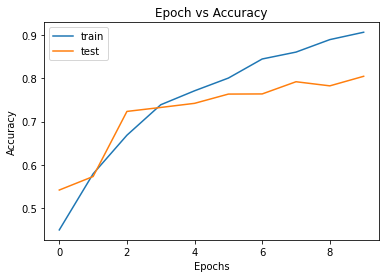

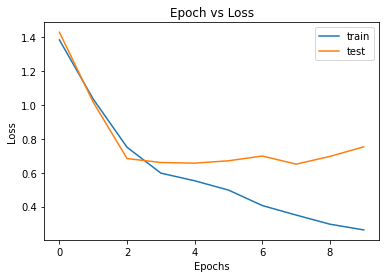

In [15]:
np.random.seed(0)
model_LSTM = Sequential(name = 'LSTM')
model_LSTM.add(CuDNNLSTM(64, input_shape=(None, X_train.shape[2]))) 
model_LSTM.add(Dense(100, activation='tanh'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(BatchNormalization())
model_LSTM.add(Dense(6, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
print(model_LSTM.summary())

LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/' + model_LSTM.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='accuracy', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)


history = model_LSTM.fit(X_train, Y_train , epochs=10, batch_size=32, 
                    validation_data=(X_test, Y_test ), callbacks=[tb, chkpt])

plot_graphs(history)
scores[1,:]=calc_scores(history)

Model: "bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              142336    
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 100)               25700     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 6)                 606       
                                                                 
Total params: 169,042
Trainable params: 168,842


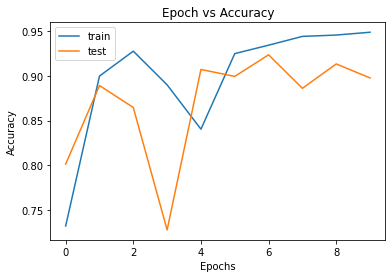

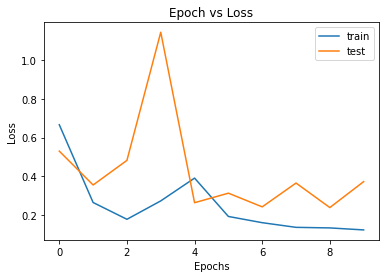

In [16]:
np.random.seed(0)
model_biLSTM = Sequential(name = 'bidirectional_LSTM')
model_biLSTM.add(Bidirectional(CuDNNLSTM(128), input_shape=(None, X_train.shape[2])))
model_biLSTM.add(Dense(100, activation='selu'))
model_biLSTM.add(Dropout(0.2))
model_biLSTM.add(BatchNormalization())
model_biLSTM.add(Dense(6, activation='softmax'))
model_biLSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
print(model_biLSTM.summary())

LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/' + model_biLSTM.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='accuracy', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)


history = model_biLSTM.fit(X_train, Y_train , epochs=10, batch_size=32,
                    validation_data=(X_test, Y_test ), callbacks=[tb, chkpt])

plot_graphs(history)
scores[2,:]=calc_scores(history)

In [17]:
X_fin2=np.concatenate((X_train,X_test))
for i in range(X_train.shape[2]):
    maxi=np.amax(X_fin2[:,:,i])
    mini=np.amin(X_fin2[:,:,i])
    
    X_train[:,:,i]= (X_train[:,:,i]-mini)/(maxi-mini)
    X_test[:,:,i]= (X_test[:,:,i]-mini)/(maxi-mini)

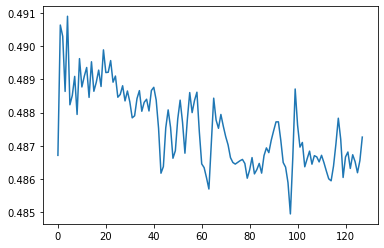

(1, 16, 16)


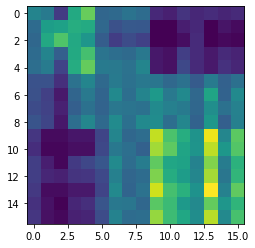

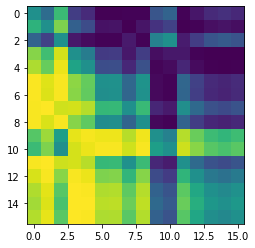

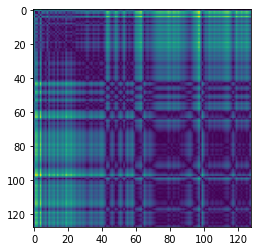

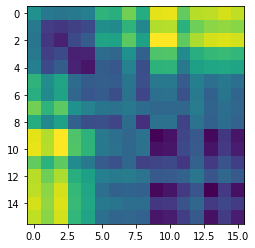

In [18]:
acv=X_train[0,:,0]
plt.plot(acv)
plt.show()
factor=8
k=int(len(acv)/factor)
transformer1 = MarkovTransitionField(image_size=1/factor,strategy='uniform', overlapping=True)#,strategy='uniform')
transformer2 = GramianAngularField(image_size=1/factor,method='difference',overlapping=True)
transformer3 = RecurrencePlot()#threshold=0.0005)
transformer4 = RecurrencePlot()#threshold=10)
p=transformer1.transform(acv.reshape(1,-1))
q=transformer2.transform(acv.reshape(1,-1))
r=transformer3.transform(acv.reshape(1,-1))
print(p.shape)
plt.imshow(p.reshape(k,k));
plt.show()
plt.imshow(q.reshape(k,k));
plt.show()
plt.imshow(r.reshape(factor*k,factor*k));
plt.show()
avg_filt=layers.AveragePooling2D((factor, factor))
plt.imshow(avg_filt(r.reshape(1,len(acv),len(acv),1)).reshape(k,k));

In [19]:
import warnings

#suppress warnings like RunTime error
warnings.filterwarnings('ignore')

In [20]:
def new_X_MTF(X):
    Xp=np.zeros(shape=(X.shape[0],k,k,X.shape[2],1), dtype=np.float32)
    for i in range(X.shape[0]):
        for j in range(X.shape[2]):
            dt=X[i,:,j]
            img=transformer1.transform(dt.reshape(1,-1))
            Xp[i,:,:,j,0]=img
    return Xp

X_MTF_train=new_X_MTF(X_train)
X_MTF_test=new_X_MTF(X_test)
x1,x2,x3,x4,x5= X_MTF_train.shape
#X_MTF_train=X_MTF_train.reshape(x1,x2,x3,x4,1)
#X_MTF_test=X_MTF_test.reshape(x1,x2,x3,x4,1)
print(x1,x2,x3,x4)

7352 16 16 9


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 12, 12, 8, 10)     510       
                                                                 
 batch_normalization_5 (Batc  (None, 12, 12, 8, 10)    40        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 12, 12, 8, 10)     0         
                                                                 
 conv3d_1 (Conv3D)           (None, 10, 10, 7, 50)     9050      
                                                                 
 dropout_8 (Dropout)         (None, 10, 10, 7, 50)     0         
                                                                 
 conv3d_2 (Conv3D)           (None, 7, 7, 5, 10)       24010     
                                                        

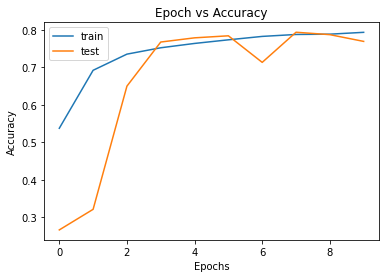

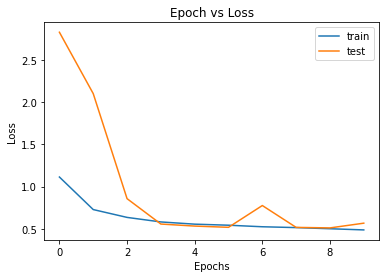

In [21]:
np.random.seed(0)
x1,x2,x3,x4,x5= X_MTF_train.shape

model_MTF = models.Sequential()
model_MTF.add(layers.Conv3D(10, (5, 5, 2), activation='selu', input_shape=(x2,x3, x4, 1)))#, 1)))
model_MTF.add(BatchNormalization())
#model_MTF.add(layers.MaxPooling3D((2, 2, 1)))
model_MTF.add(Dropout(0.5))
#model_MTF.add(layers.ZeroPadding3D(padding=(2, 2, 1)))
model_MTF.add(layers.Conv3D(50, (3, 3, 2), activation='selu'))
model_MTF.add(Dropout(0.5))
model_MTF.add(layers.Conv3D(10, (4, 4, 3), activation='selu'))
model_MTF.add(layers.Flatten())
model_MTF.add(Dropout(0.5))
model_MTF.add(layers.Dense(100, activation='tanh'))
#model_MTF.add(Dropout(0.5))
model_MTF.add(layers.Dense(6, activation='softmax'))
print(model_MTF.summary())

model_MTF.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/' + model_MTF.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='loss', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)

history = model_MTF.fit(X_MTF_train, Y_train , epochs=10, 
                    batch_size=64, validation_data=(X_MTF_test, Y_test), callbacks=[tb, chkpt])

plot_graphs(history)
scores[3,:]=calc_scores(history)


In [22]:
def new_X_GAF(X):
    Xp=np.zeros(shape=(X.shape[0],k,k,X.shape[2],1), dtype=np.float32)
    for i in range(X.shape[0]):
        for j in range(X.shape[2]):
            dt=X[i,:,j]
            img=transformer2.transform(dt.reshape(1,-1))
            Xp[i,:,:,j,0]=img
    return Xp

X_GAF_train=new_X_GAF(X_train)
X_GAF_test=new_X_GAF(X_test)
x1,x2,x3,x4,x5= X_GAF_train.shape
#X_GAF_train=X_GAF_train.reshape(x1,x2,x3,x4,1)
#X_GAF_test=X_GAF_test.reshape(x1,x2,x3,x4,1)
print(x1,x2,x3,x4)

7352 16 16 9


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 12, 12, 8, 10)     510       
                                                                 
 batch_normalization_6 (Batc  (None, 12, 12, 8, 10)    40        
 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 8, 10)     0         
                                                                 
 conv3d_4 (Conv3D)           (None, 10, 10, 7, 50)     9050      
                                                                 
 dropout_11 (Dropout)        (None, 10, 10, 7, 50)     0         
                                                                 
 conv3d_5 (Conv3D)           (None, 7, 7, 5, 10)       24010     
                                                      

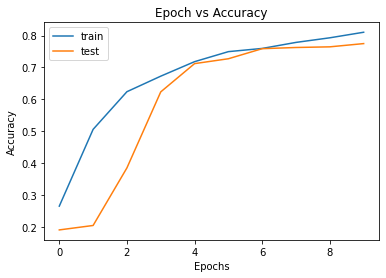

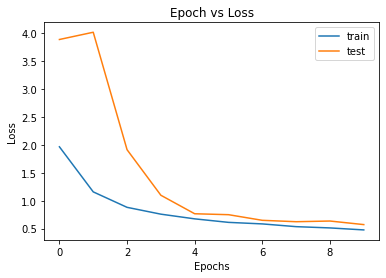

In [23]:
np.random.seed(0)
x1,x2,x3,x4,x5= X_GAF_train.shape
model_GAF = models.Sequential()
model_GAF.add(layers.Conv3D(10, (5, 5, 2), activation='selu', input_shape=(x2,x3, x4, 1)))#, 1)))
model_GAF.add(BatchNormalization())
#model_GAF.add(layers.MaxPooling3D((2, 2, 1)))
model_GAF.add(Dropout(0.5))
#model_GAF.add(layers.ZeroPadding3D(padding=(2, 2, 1)))
model_GAF.add(layers.Conv3D(50, (3, 3, 2), activation='selu'))
model_GAF.add(Dropout(0.5))
model_GAF.add(layers.Conv3D(10, (4, 4, 3), activation='selu'))
model_GAF.add(layers.Flatten())
model_GAF.add(Dropout(0.5))
model_GAF.add(layers.Dense(100, activation='tanh'))
#model_GAF.add(Dropout(0.5))
model_GAF.add(layers.Dense(6, activation='softmax'))
print(model_GAF.summary())

model_GAF.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/' + model_GAF.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='loss', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)

history = model_GAF.fit(X_GAF_train, Y_train , epochs=10, 
                    batch_size=64, validation_data=(X_GAF_test, Y_test), callbacks=[tb, chkpt])

plot_graphs(history)
scores[4,:]=calc_scores(history)


In [24]:
def new_X_RP(X):
    Xp=np.zeros(shape=(X.shape[0],k,k,X.shape[2],1), dtype=np.float32)
    for i in range(X.shape[0]):
        for j in range(X.shape[2]):
            dt=X[i,:,j]
            #if j<7:
            img=transformer3.transform(dt.reshape(1,-1))
            #else:
            #    img=transformer4.transform(dt.reshape(1,-1))
            img=avg_filt(img.reshape(1,len(acv),len(acv),1)).reshape(k,k)
            Xp[i,:,:,j,0]=img
    return Xp

X_RP_train=new_X_RP(X_train)
X_RP_test=new_X_RP(X_test)
x1,x2,x3,x4,x5= X_RP_train.shape
#X_RP_train=X_RP_train.reshape(x1,x2,x3,x4,1)
#X_RP_test=X_RP_test.reshape(x1,x2,x3,x4,1)
print(x1,x2,x3,x4)

7352 16 16 9


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_6 (Conv3D)           (None, 12, 12, 8, 10)     510       
                                                                 
 batch_normalization_7 (Batc  (None, 12, 12, 8, 10)    40        
 hNormalization)                                                 
                                                                 
 dropout_13 (Dropout)        (None, 12, 12, 8, 10)     0         
                                                                 
 conv3d_7 (Conv3D)           (None, 10, 10, 7, 50)     9050      
                                                                 
 dropout_14 (Dropout)        (None, 10, 10, 7, 50)     0         
                                                                 
 conv3d_8 (Conv3D)           (None, 7, 7, 5, 10)       24010     
                                                      

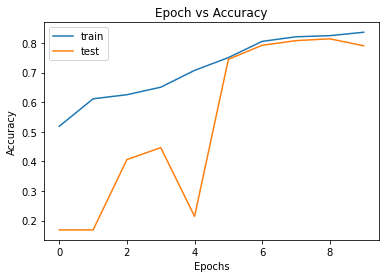

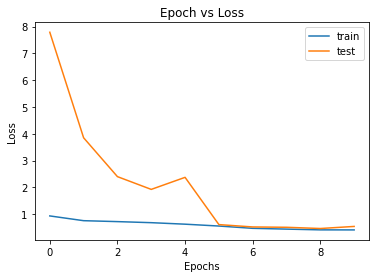

In [25]:
np.random.seed(0)
x1,x2,x3,x4,x5= X_RP_train.shape

model_RP = models.Sequential()
model_RP.add(layers.Conv3D(10, (5, 5, 2), activation='selu', input_shape=(x2,x3, x4, 1)))#, 1)))
model_RP.add(BatchNormalization())
#model_RP.add(layers.MaxPooling3D((2, 2, 1)))
model_RP.add(Dropout(0.5))
#model_RP.add(layers.ZeroPadding3D(padding=(2, 2, 1)))
model_RP.add(layers.Conv3D(50, (3, 3, 2), activation='selu'))
model_RP.add(Dropout(0.5))
model_RP.add(layers.Conv3D(10, (4, 4, 3), activation='selu'))
model_RP.add(layers.Flatten())
model_RP.add(Dropout(0.5))
model_RP.add(layers.Dense(100, activation='tanh'))
#model_RP.add(Dropout(0.5))
model_RP.add(layers.Dense(6, activation='softmax'))
print(model_RP.summary())

model_RP.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/' + model_RP.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='loss', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)

history = model_RP.fit(X_RP_train, Y_train , epochs=10, 
                    batch_size=64, validation_data=(X_RP_test, Y_test), callbacks=[tb, chkpt])

plot_graphs(history)
scores[5,:]=calc_scores(history)


In [26]:
X_all_img_train=np.concatenate((X_GAF_train,X_MTF_train,X_RP_train),axis=3)
X_all_img_test=np.concatenate((X_GAF_test,X_MTF_test,X_RP_test),axis=3)

x1,x2,x3,x4,x5= X_all_img_train.shape
#X_all_img_train=X_all_img_train.reshape(x1,x2,x3,x4,1)
#X_all_img_test=X_all_img_test.reshape(x1,x2,x3,x4,1)
print(x1,x2,x3,x4)

7352 16 16 27


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_9 (Conv3D)           (None, 12, 12, 26, 10)    510       
                                                                 
 batch_normalization_8 (Batc  (None, 12, 12, 26, 10)   40        
 hNormalization)                                                 
                                                                 
 max_pooling3d (MaxPooling3D  (None, 12, 12, 13, 10)   0         
 )                                                               
                                                                 
 dropout_16 (Dropout)        (None, 12, 12, 13, 10)    0         
                                                                 
 zero_padding3d (ZeroPadding  (None, 16, 16, 15, 10)   0         
 3D)                                                             
                                                      

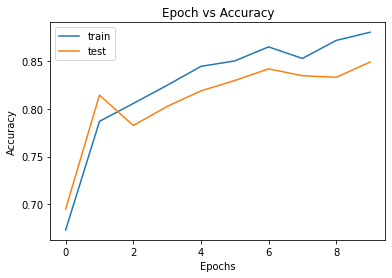

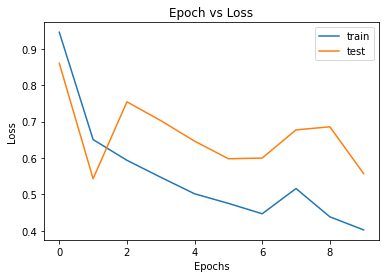

In [27]:
np.random.seed(0)
model = models.Sequential()
model.add(layers.Conv3D(10, (5, 5, 2), activation='selu', input_shape=(x2,x3, x4, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling3D((1, 1, 2)))
model.add(Dropout(0.5))
model.add(layers.ZeroPadding3D(padding=(2, 2, 1)))
model.add(layers.Conv3D(20, (3, 3, 3), activation='selu'))
#model.add(Dropout(0.5))
model.add(layers.Conv3D(10, (4, 4, 3), activation='selu'))
model.add(layers.Flatten())
#model.add(Dropout(0.5))
#model.add(layers.Dense(2100, activation='selu'))
#model.add(Dropout(0.5))
#model.add(layers.Dense(120, activation='selu'))
model.add(layers.Dense(6, activation='softmax'))
print(model.summary())


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)
shutil.rmtree('weights', ignore_errors=True)
weights_dir = 'weights/' + model.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='loss', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)

history = model.fit(X_all_img_train, Y_train , epochs=10, 
                    batch_size=32, validation_data=(X_all_img_test, Y_test), callbacks=[tb, chkpt])

plot_graphs(history)
scores[6,:]=calc_scores(history)

93/93 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.8490


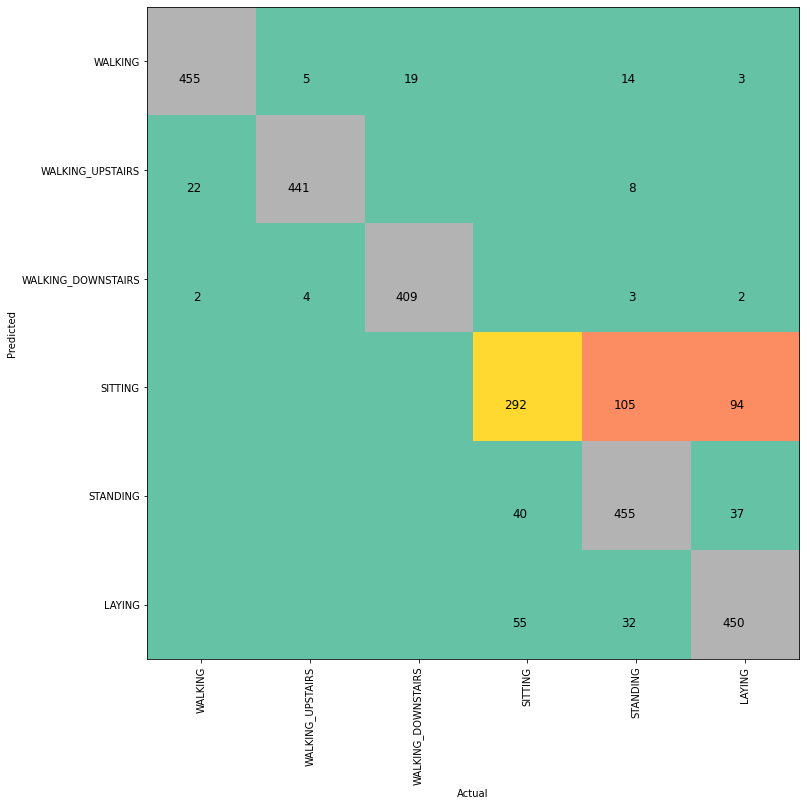

In [28]:
model.evaluate(X_all_img_test, Y_test)

pred = np.argmax(model.predict(X_all_img_test), axis = -1)
confusion = confusion_matrix(np.argmax(Y_test, axis = -1), pred)
NUM_LABELS = 12
f, axes = plt.subplots(1,1, figsize = (12,12))
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.grid(False)
axes.set_xticklabels(class_labels, rotation = 90)
axes.set_yticklabels(class_labels)
axes.set_yticks(list(range(NUM_LABELS)))
axes.set_xticks(list(range(NUM_LABELS)))
plt.imshow(confusion, cmap=plt.cm.Set2, interpolation='nearest')

for i, cas in enumerate(confusion):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=12, color='black')

Model: "CNN_and_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 32, 32)        832       
                                                                 
 batch_normalization_15 (Bat  (None, 28, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 16, 32)       0         
 2D)                                                             
                                                                 
 zero_padding2d_6 (ZeroPaddi  (None, 16, 18, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 16, 64)        18496     
                                                      

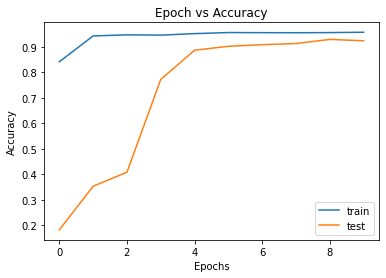

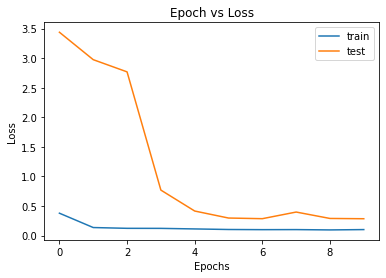

In [35]:
np.random.seed(0) 
model_comb = models.Sequential(name = 'CNN_and_LSTM') 
x1,x2,x3, x4= X_train_base.shape

#model_comb.build(input_shape=(x2, x3, 1))
#model_comb.add(layers.ZeroPadding2D(padding=(2, 2)))
model_comb.add(Conv2D(32,(5, 5), activation='relu', input_shape=(x2, x3, 1)))
#model_comb.add(Dropout(0.5))
model_comb.add(BatchNormalization())
model_comb.add(MaxPooling2D((2,2)))
model_comb.add(layers.ZeroPadding2D(padding=(1, 1)))
model_comb.add(Conv2D(64,(3, 3), activation='relu'))
model_comb.add(Dropout(0.5))
model_comb.add(BatchNormalization())
model_comb.add(layers.ZeroPadding2D(padding=(1, 1)))
model_comb.add(Conv2D(16,(3, 3), activation='selu'))
model_comb.add(Dropout(0.5))
model_comb.add(BatchNormalization())
model_comb.add(layers.TimeDistributed(Flatten()))
#TimeDistributed(Flatten())
model_comb.add(Bidirectional(CuDNNLSTM(128)))
#model_comb.add(Dropout(0.5))
#model.add(layers.Dense(2100, activation='selu'))
#model.add(Dropout(0.5))
#model_comb.add(layers.Dense(100, activation='selu'))
model_comb.add(layers.Dense(6, activation='softmax'))
print(model_comb.summary())

model_comb.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

LOG_DIR = os.path.join(os.getcwd(), 'logs')

os.chdir(os.getcwd())

tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/' + model_comb.name + \
            '-{epoch:02d}-{loss:.2f}'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='loss', save_best_only=True, save_weights_only=True, mode='auto', save_freq=1)

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3)


history = model_comb.fit(X_train_base, Y_train , epochs=10, batch_size=64,
                    validation_data=(X_test_base, Y_test ), callbacks=[tb, chkpt])

plot_graphs(history)
scores[7,:]=calc_scores(history)

93/93 [==============================] - 1s 8ms/step - loss: 0.2848 - accuracy: 0.9243


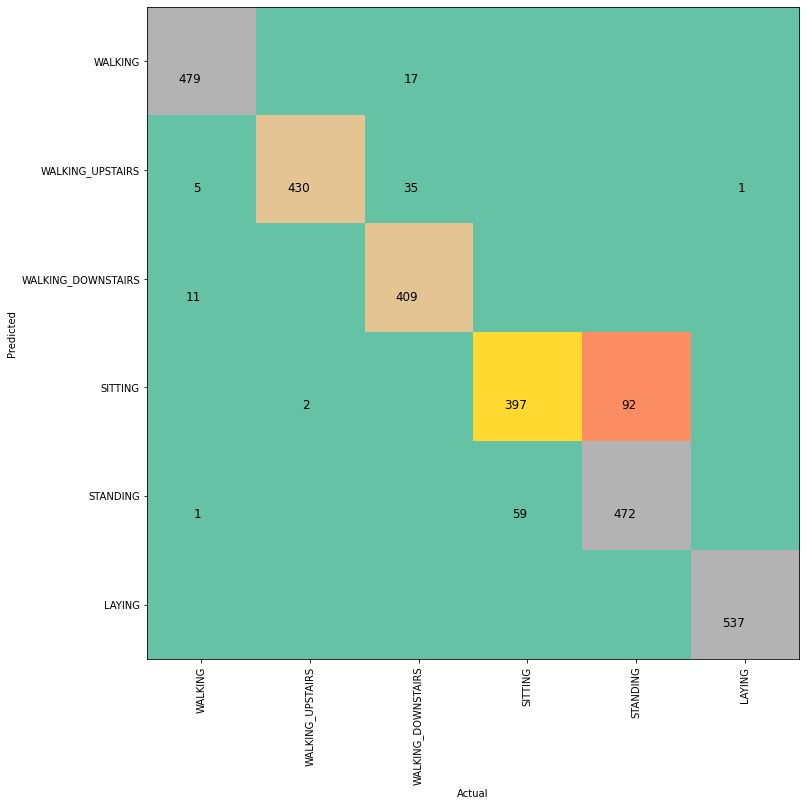

In [36]:
model_comb.evaluate(X_test_base, Y_test)

pred = np.argmax(model_comb.predict(X_test_base), axis = -1)
confusion = confusion_matrix(np.argmax(Y_test, axis = -1), pred)
NUM_LABELS = 12
f, axes = plt.subplots(1,1, figsize = (12,12))
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.grid(False)
axes.set_xticklabels(class_labels, rotation = 90)
axes.set_yticklabels(class_labels)
axes.set_yticks(list(range(NUM_LABELS)))
axes.set_xticks(list(range(NUM_LABELS)))
plt.imshow(confusion, cmap=plt.cm.Set2, interpolation='nearest')

for i, cas in enumerate(confusion):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=12, color='black')

In [37]:
import pandas as pd
row_names=["CNN simple","LSTM simple","Bidirectional LSTM","MTF image CNN"
           ,"GAF image CNN","RP image CNN","MTF+GAF+RP image CNN","CNN+LSTM"]
column_names=["Epochs","Training Accuracy %","Test Accuracy %"]
Full_results= pd.DataFrame(scores, index=row_names, columns=column_names)
Full_results

,Epochs,Training Accuracy %,Test Accuracy %
CNN simple,10.0,94.423288,87.037665
LSTM simple,10.0,90.628397,80.454701
Bidirectional LSTM,10.0,94.844937,89.752293
MTF image CNN,10.0,79.379761,76.959622
GAF image CNN,10.0,81.025571,77.468610
RP image CNN,10.0,83.664310,79.097384
MTF+GAF+RP image CNN,10.0,88.030469,84.899896
CNN+LSTM,10.0,95.783460,92.432982
